In [2]:
import numpy
import scipy
from matplotlib import pyplot

In [3]:
alpha = numpy.random.uniform(0, 1)
beta = numpy.random.uniform(0, 1)
print(alpha, beta)

0.42852268621028144 0.5067698510899324


In [4]:
eps = 0.001
xk = []
yk = []
y_plot = []


for k in range(100):
    x = k / 100
    y = alpha * x + beta + numpy.random.normal(0,1)
    y_plot.append(alpha * x + beta)
    xk.append(x)
    yk.append(y)

In [5]:
def linear_func(x, a, b):
    return a * x + b

def rational_func(x,a,b):
    return a / (1 + b * x)

In [6]:
def least_squares(x, f):
    sum = 0
    for k in range(100):
        sum += (f(xk[k], x[0], x[1]) - yk[k])**2

    return sum


In [7]:
def brute_search(f, args):
    return scipy.optimize.brute(
        f,
        ranges=(slice(0, 1, eps), (slice(0, 1, eps))),
        args=(args,)
    )

lmin_ex, lmax_ex = brute_search(least_squares, linear_func)
rmin_ex, rmax_ex = brute_search(least_squares, rational_func)

In [10]:
def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='CG',
        args=(args,)
    )
lmin_cd, lmax_cd = gauss_search(least_squares, linear_func).x
rmin_cd, rmax_cd = gauss_search(least_squares, rational_func).x

In [12]:
def neldermead(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=(args,)
    )

ln_min, ln_max = neldermead(least_squares, linear_func).x
rn_min, rn_max = neldermead(least_squares, rational_func).x

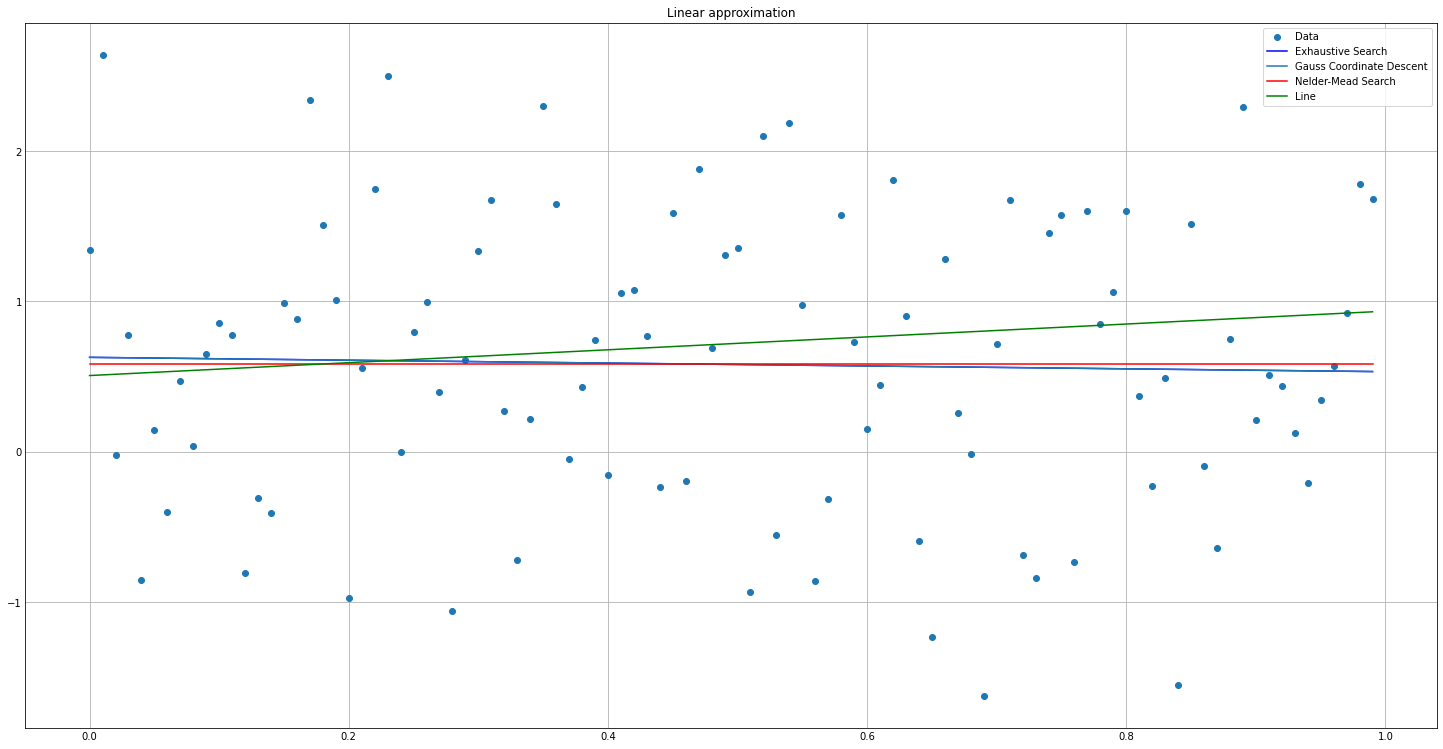

In [16]:
pyplot.style.use('_mpl-gallery')

pyplot.figure(figsize=(20, 10))
pyplot.scatter(xk, yk,  label='Data')

y = []
for each in xk:
    y.append(linear_func(each, lmin_ex, lmax_ex))
pyplot.plot(xk, y, label='Exhaustive Search', color='b')

y = []
for each in xk:
    y.append(linear_func(each, lmin_cd, lmax_cd))
pyplot.plot(xk, y, label='Gauss Coordinate Descent')

y = []
for each in xk:
    y.append(linear_func(each, ln_min, ln_max))
pyplot.plot(xk, y, label='Nelder-Mead Search', color='r')

pyplot.plot(xk, y_plot, label='Line', color='g')


pyplot.legend()
pyplot.title('Linear approximation')
pyplot.show()

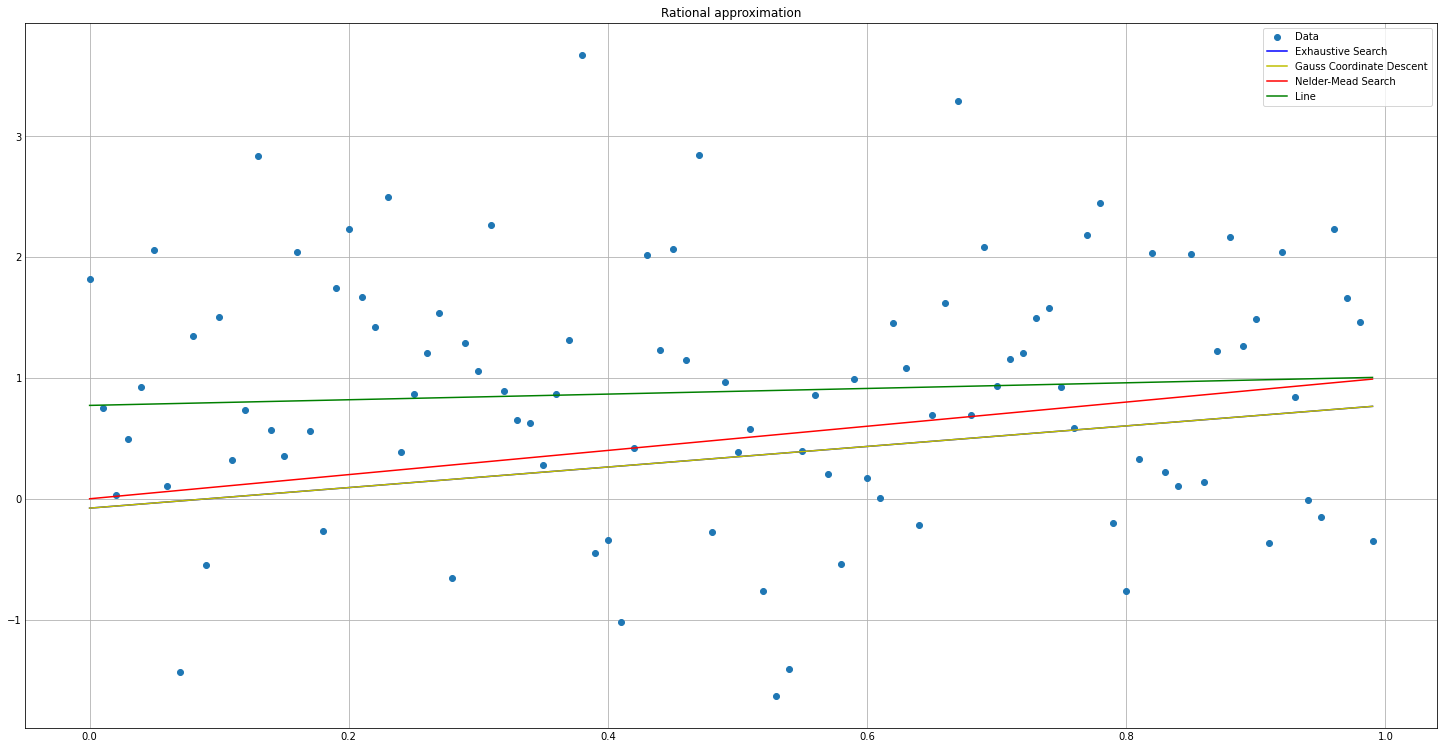

In [11]:
pyplot.style.use('_mpl-gallery')

pyplot.figure(figsize=(20, 10))
pyplot.scatter(xk, yk,  label='Data')

y= []
for each in xk:
    y.append(linear_func(each, rmin_ex, rmax_ex))
pyplot.plot(xk, y, label='Exhaustive Search', color='b')

y= []
for each in xk:
    y.append(linear_func(each, rmin_cd, rmax_cd))
pyplot.plot(xk, y, label='Gauss Coordinate Descent', color='y')

y= []
for each in xk:
    y.append(linear_func(each, rn_min, rn_max))
y = [linear_func(each, rn_min, rn_max) for each in xk]
pyplot.plot(xk, y, label='Nelder-Mead Search', color='r')

pyplot.plot(xk, y_plot, label='Line', color='g')

pyplot.legend()
pyplot.title('Rational approximation')
pyplot.show()